### Importing the necessary packages

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Creating a Function to Generate Random Walks

In [2]:
def rw_gen(T = 1, N = 100, mu = 0.1, sigma = 0.01, S0 = 20):        
    dt = float(T)/N
    t = np.linspace(0, T, N)
    W = np.random.standard_normal(size = N) 
    W = np.cumsum(W)*np.sqrt(dt) ### standard brownian motion ###
    X = (mu-0.5*sigma**2)*t + sigma*W 
    S = S0*np.exp(X) ### geometric brownian motion ###
    return S

### Importing the Data Set

In [3]:
###### This step is not mandatory if you have a starting value in mind
raw_csv_data = pd.read_csv("Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

### Setting the Parameters and Calling the Function

In [11]:
dates = pd.date_range('1994-01-07', '2013-04-05')                   # Same as the training set
T = (dates.max()-dates.min()).days / 365                            # We're generating daily values
N = dates.size                                                      # Number of observations
start_price = df.ftse.mean()                                        # We're using the mean of the our existing time series as a starting point
y = pd.Series(rw_gen(T, N, sigma=0.3, S0=start_price), index=dates) # Calling the RW-generating function

### Plotting the RW 

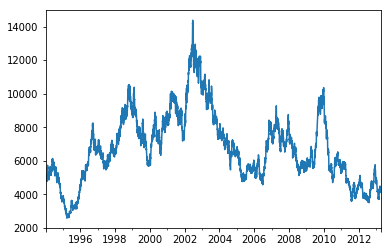

In [12]:
###### This is also optional. We're just checking what our new series looks like.
y.plot()
plt.show()

### Storing the Random Walk in a CSV file

In [6]:
#y.to_csv('RandWalk2.csv', header = True) # Make sure to avoid using RandWalk.csv, since that will just write over the existing file